# Automate API Extraction + Extra -- Project

In [1]:
import pandas as pd

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json


In [34]:
import pandas as pd

# This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


# Automating Pull into CSV

In [ ]:
# Note

Original URL from CoinMarketCap API Documentation is:
https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest

URL used is:
https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest
(Note: "pro-api.coinmarketcap.com" is the domain.)

Original API Key from CoinMarketCap API Documentation is:
b54bcf4d-1bca-4e8e-9a24-22ff2c3d462c

Alex's API Key is:
0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509

My own API Key is:
a045dc8e-62f3-49e6-a33b-97c10e513f6f

---

If it fails, we need to increase the data rate limit.
Steps:
1. Open the Anaconda Prompt.
2. Type the following command and press Enter:
    jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10
3. Select the file.
4. Run the code again.

---

if its still fail:
1. Open the Anaconda Prompt.
2. Copy and paste one of these URLs (local host URL) into your browser:
        http://localhost:8890/tree?token=c0e9e1fad4d62ee85908195c8c7dfd0735566b78ba86875b
        http://127.0.0.1:8890/tree?token=c0e9e1fad4d62ee85908195c8c7dfd0735566b78ba86875b
3. Alternatively, you can access the server and open the following file in your browser:
        file:///C:/Users/User%20ID/AppData/Roaming/jupyter/runtime/jpserver-12944-open.html
4. Select the file and run the code again.


In [47]:


def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start':'1',
        'limit':'15',
        'convert':'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': 'a045dc8e-62f3-49e6-a33b-97c10e513f6f',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        # print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
        

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'D:\Data Analytic\Python\Folder for Output\API.csv'):
        df.to_csv(r'D:\Data Analytic\Python\Folder for Output\API.csv', header = 'column_names')
    else:
        df.to_csv(r'D:\Data Analytic\Python\Folder for Output\API.csv', mode = 'a', header = False)



In [49]:
import os
from time import time
from time import sleep


# we're gonna create loop
for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed


KeyboardInterrupt: 

In [51]:
df72 = pd.read_csv(r'D:\Data Analytic\Python\Folder for Output\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11788,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.977278e+07,1.977278e+07,False,NaN,1,NaN,NaN,NaN,2024-10-25T14:02:00.000Z,68210.639422,3.001581e+10,-11.4430,0.259966,0.593509,0.056053,6.991624,7.001368,-1.604448,1.348714e+12,57.9095,1.432423e+12,NaN,2024-10-25T14:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-25 21:04:43.976497
1,1,1027,Ethereum,ETH,ethereum,9447,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.203974e+08,1.203974e+08,True,NaN,2,NaN,NaN,NaN,2024-10-25T14:02:00.000Z,2548.111345,1.664270e+10,-12.6160,0.442546,0.648051,-3.019649,-2.691365,-6.536686,-23.302188,3.067860e+11,13.1724,3.067860e+11,NaN,2024-10-25T14:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-25 21:04:43.976497
2,2,825,Tether USDt,USDT,tether,101536,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.203019e+11,1.213379e+11,True,NaN,3,NaN,NaN,NaN,2024-10-25T14:02:00.000Z,0.999184,5.637056e+10,-11.1440,-0.009383,0.018729,-0.074836,-0.077800,-0.117786,-0.097698,1.202038e+11,5.1598,1.212389e+11,NaN,2024-10-25T14:02:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-25 21:04:43.976497
3,3,1839,BNB,BNB,bnb,2271,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.459312e+08,1.459312e+08,False,NaN,4,NaN,NaN,NaN,2024-10-25T14:02:00.000Z,592.683552,1.494811e+09,-11.5370,0.263096,0.040056,-0.737385,-0.677985,5.406592,0.149178,8.649104e+10,3.7085,8.649104e+10,NaN,2024-10-25T14:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-25 21:04:43.976497
4,4,5426,Solana,SOL,solana,774,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.700874e+08,5.871070e+08,True,NaN,5,NaN,NaN,NaN,2024-10-25T14:02:00.000Z,174.963431,3.300841e+09,-23.2068,0.929826,-0.406660,13.757809,16.044232,9.159435,-6.724800,8.224810e+10,3.5305,1.027223e+11,NaN,2024-10-25T14:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-25 21:04:43.976497
5,5,3408,USDC,USDC,usd-coin,22655,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.442469e+10,3.442469e+10,False,NaN,6,NaN,NaN,NaN,2024-10-25T14:02:00.000Z,0.999777,6.879550e+09,-5.6006,-0.000732,-0.005971,-0.034501,-0.024999,-0.033893,-0.027037,3.441699e+10,1.4751,3.441699e+10,NaN,2024-10-25T14:02:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-25 21:04:43.976497
6,6,52,XRP,XRP,xrp,1411,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.675636e+10,9.998709e+10,False,NaN,7,NaN,NaN,NaN,2024-10-25T14:02:00.000Z,0.525222,8.013541e+08,-24.7630,0.062763,-0.956636,-3.591741,-11.140741,-11.482698,-13.356928,2.980967e+10,1.2796,5.252217e+10,NaN,2024-10-25T14:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-25 21:04:43.976497
7,7,74,Dogecoin,DOGE,dogecoin,1088,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.465145e+11,1.465145e+11,True,NaN,8,NaN,NaN,NaN,2024-10-25T14:02:00.000Z,0.138411,1.235903e+09,-16.1818,-0.085681,-3.048403,3.001863,26.773009,28.853653,0.567063,2.027915e+10,0.8707,2.027915e+10,NaN,2024-10-25T14:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-25 21:04:43.976497
8,8,1958,TRON,TRX,tron,1058,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",

# Transforming Data

In [110]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start':'1',
        'limit':'15',
        'convert':'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': 'a045dc8e-62f3-49e6-a33b-97c10e513f6f',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        # print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
        

    # we're going to append that to original dataframe
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df2])



In [112]:
import os
from time import time
from time import sleep


# we're gonna create loop
for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [114]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11788,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19772781.00000,19772781.00000,False,NaN,1,NaN,NaN,None,2024-10-25T14:03:00.000Z,68252.48294,29922055806.65702,-11.71960,0.33920,0.65522,0.12193,6.96747,6.98219,-1.52992,1349541397849.69580,57.92930,1433302141709.03003,None,2024-10-25T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-25 21:05:45.052837
1,1027,Ethereum,ETH,ethereum,9447,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120397409.21757,120397409.21757,True,NaN,2,NaN,NaN,None,2024-10-25T14:03:00.000Z,2549.10287,16619575037.28027,-12.73740,0.50742,0.68722,-2.95519,-2.81502,-6.57951,-23.24882,306905381553.68365,13.17400,306905381553.67999,None,2024-10-25T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-25 21:05:45.052837
2,825,Tether USDt,USDT,tether,101536,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,120301926990.84665,121337925865.33533,True,NaN,3,NaN,NaN,None,2024-10-25T14:03:00.000Z,0.99915,56263267352.06310,-11.31310,-0.05475,0.01554,-0.10070,-0.09311,-0.10242,-0.09242,120199938140.17218,5.15960,121235058721.71001,None,2024-10-25T14:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-25 21:05:45.052837
3,1839,BNB,BNB,bnb,2271,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145931224.77828,145931224.77828,False,NaN,4,NaN,NaN,None,2024-10-25T14:03:00.000Z,592.71620,1494660522.29498,-11.54590,0.27426,0.04557,-0.73795,-0.69291,5.35122,0.18367,86495801094.12654,3.71280,86495801094.13000,None,2024-10-25T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-25 21:05:45.052837
4,5426,Solana,SOL,solana,774,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,470087365.43617,587106997.66802,True,NaN,5,NaN,NaN,None,2024-10-25T14:03:00.000Z,174.97920,3284973979.39717,-23.57600,0.96425,-0.39768,13.76425,16.00686,9.09802,-6.71582,82255512228.10432,3.53080,102731514132.64999,None,2024-10-25T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-25 21:05:45.052837
5,3408,USDC,USDC,usd-coin,22655,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,34424687801.52345,34424687801.52345,False,NaN,6,NaN,NaN,None,2024-10-25T14:03:00.000Z,0.99961,6855489720.27757,-5.93080,-0.05777,-0.02231,-0.06396,-0.04603,-0.03090,-0.03728,34411371165.89888,1.47490,34411371165.90000,None,2024-10-25T14:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-25 21:05:45.052837
6,52,XRP,XRP,xrp,1411,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56756356815.00000,99987094030.00000,False,NaN,7,NaN,NaN,None,2024-10-25T14:03:00.000Z,0.52521,800171243.86117,-24.87410,0.06766,-0.95956,-3.58994,-11.14991,-11.49823,-13.35269,29808789878.65778,1.27950,52520618925.24000,None,2024-10-25T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-25 21:05:45.052837
7,74,Dogecoin,DOGE,dogecoin,1088,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,146514486383.70520,146514486383.70520,True,NaN,8,NaN,NaN,None,2024-10-25T14:03:00.000Z,0.13842,1219341488.03639,-17.30500,-0.05056,-3.04104,3.00816,26.73953,28.83536,0.59421,20280688620.03382,0.86930,20280688620.03000,None,2024-10-25T14:03:00.000

In [116]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [118]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11788,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19772781.00000,19772781.00000,False,NaN,1,NaN,NaN,None,2024-10-25T14:03:00.000Z,68252.48294,29922055806.65702,-11.71960,0.33920,0.65522,0.12193,6.96747,6.98219,-1.52992,1349541397849.69580,57.92930,1433302141709.03003,None,2024-10-25T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-25 21:05:45.052837
1,1027,Ethereum,ETH,ethereum,9447,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120397409.21757,120397409.21757,True,NaN,2,NaN,NaN,None,2024-10-25T14:03:00.000Z,2549.10287,16619575037.28027,-12.73740,0.50742,0.68722,-2.95519,-2.81502,-6.57951,-23.24882,306905381553.68365,13.17400,306905381553.67999,None,2024-10-25T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-25 21:05:45.052837
2,825,Tether USDt,USDT,tether,101536,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,120301926990.84665,121337925865.33533,True,NaN,3,NaN,NaN,None,2024-10-25T14:03:00.000Z,0.99915,56263267352.06310,-11.31310,-0.05475,0.01554,-0.10070,-0.09311,-0.10242,-0.09242,120199938140.17218,5.15960,121235058721.71001,None,2024-10-25T14:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-25 21:05:45.052837
3,1839,BNB,BNB,bnb,2271,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145931224.77828,145931224.77828,False,NaN,4,NaN,NaN,None,2024-10-25T14:03:00.000Z,592.71620,1494660522.29498,-11.54590,0.27426,0.04557,-0.73795,-0.69291,5.35122,0.18367,86495801094.12654,3.71280,86495801094.13000,None,2024-10-25T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-25 21:05:45.052837
4,5426,Solana,SOL,solana,774,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,470087365.43617,587106997.66802,True,NaN,5,NaN,NaN,None,2024-10-25T14:03:00.000Z,174.97920,3284973979.39717,-23.57600,0.96425,-0.39768,13.76425,16.00686,9.09802,-6.71582,82255512228.10432,3.53080,102731514132.64999,None,2024-10-25T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-25 21:05:45.052837
5,3408,USDC,USDC,usd-coin,22655,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,34424687801.52345,34424687801.52345,False,NaN,6,NaN,NaN,None,2024-10-25T14:03:00.000Z,0.99961,6855489720.27757,-5.93080,-0.05777,-0.02231,-0.06396,-0.04603,-0.03090,-0.03728,34411371165.89888,1.47490,34411371165.90000,None,2024-10-25T14:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-25 21:05:45.052837
6,52,XRP,XRP,xrp,1411,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56756356815.00000,99987094030.00000,False,NaN,7,NaN,NaN,None,2024-10-25T14:03:00.000Z,0.52521,800171243.86117,-24.87410,0.06766,-0.95956,-3.58994,-11.14991,-11.49823,-13.35269,29808789878.65778,1.27950,52520618925.24000,None,2024-10-25T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-25 21:05:45.052837
7,74,Dogecoin,DOGE,dogecoin,1088,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,146514486383.70520,146514486383.70520,True,NaN,8,NaN,NaN,None,2024-10-25T14:03:00.000Z,0.13842,1219341488.03639,-17.30500,-0.05056,-3.04104,3.00816,26.73953,28.83536,0.59421,20280688620.03382,0.86930,20280688620.03000,None,2024-10-25T14:03:00.000

In [120]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.47025,0.80562,-0.10935,7.15010,7.64424,-0.99502
Ethereum,0.11463,0.61251,-3.75160,-3.00073,-6.61781,-23.15269
Tether USDt,0.00027,0.02882,-0.03524,-0.06122,-0.06592,-0.07260
BNB,0.31349,0.11587,-1.00825,-0.90166,5.70213,0.79446
Solana,1.13034,-0.08581,13.82931,16.21939,11.76384,-5.35870
USDC,0.00916,0.00443,0.00369,-0.01146,0.00945,-0.01240
XRP,0.34481,-0.70123,-3.62924,-10.87476,-11.04593,-12.74489
Dogecoin,0.20356,-2.08001,1.63251,26.06016,28.85123,1.29796
TRON,-0.18385,1.76479,4.52734,10.26133,-0.36857,20.91350


In [122]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.47025
              quote.USD.percent_change_24h     0.80562
              quote.USD.percent_change_7d     -0.10935
              quote.USD.percent_change_30d     7.15010
              quote.USD.percent_change_60d     7.64424
              quote.USD.percent_change_90d    -0.99502
Ethereum      quote.USD.percent_change_1h      0.11463
              quote.USD.percent_change_24h     0.61251
              quote.USD.percent_change_7d     -3.75160
              quote.USD.percent_change_30d    -3.00073
              quote.USD.percent_change_60d    -6.61781
              quote.USD.percent_change_90d   -23.15269
Tether USDt   quote.USD.percent_change_1h      0.00027
              quote.USD.percent_change_24h     0.02882
              quote.USD.percent_change_7d     -0.03524
              quote.USD.percent_change_30d    -0.06122
              quote.USD.percent_change_60d    -0.06592
              quote.US

In [69]:
type(df3)

pandas.core.frame.DataFrame

In [71]:
type(df4)

pandas.core.series.Series

In [124]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.47025
             quote.USD.percent_change_24h   0.80562
             quote.USD.percent_change_7d   -0.10935
             quote.USD.percent_change_30d   7.15010
             quote.USD.percent_change_60d   7.64424
             quote.USD.percent_change_90d  -0.99502
Ethereum     quote.USD.percent_change_1h    0.11463
             quote.USD.percent_change_24h   0.61251
             quote.USD.percent_change_7d   -3.75160
             quote.USD.percent_change_30d  -3.00073
             quote.USD.percent_change_60d  -6.61781
             quote.USD.percent_change_90d -23.15269
Tether USDt  quote.USD.percent_change_1h    0.00027
             quote.USD.percent_change_24h   0.02882
             quote.USD.percent_change_7d   -0.03524
             quote.USD.percent_change_30d  -0.06122
             quote.USD.percent_change_60d  -0.06592
             quote.USD.percent_change_90d  -0.07260
BNB          quote.USD.percent_change_1h    0.31349
             quote.USD.percent_change_24h   0.11587
             quote.USD.percent_change_7d   -1.00825
             quote.USD.percent_change_30d  -0.90166
             quote.USD.percent_change_60d   5.70213
             quote.USD.percent_change_90d   0.79446
Solana       quote.USD.percent_change_1h    1.13034
             quote.USD.percent_change_24h  -0.08581
             quote.USD.percent_change_7d   13.82931
             quote.USD.percent_change_30d  16.21939
             quote.USD.percent_change_60d  11.76384
             quote.USD.percent_change_90d  -5.35870
USDC         quote.USD.percent_change_1h    0.00916
             quote.USD.percent_change_24h   0.00443
             quote.USD.percent_change_7d    0.00369
             quote.USD.percent_change_30d  -0.01146
             quote.USD.percent_change_60d   0.00945
             quote.USD.percent_change_90d  -0.01240
XRP          quote.USD.percent_change_1h    0.34481
             quote.USD.percent_change_24h  -0.70123
             quote.USD.percent_change_7d   -3.62924
             quote.USD.percent_change_30d -10.87476
             quote.USD.percent_change_60d -11.04593
             quote.USD.percent_change_90d -12.74489
Dogecoin     quote.USD.percent_change_1h    0.20356
             quote.USD.percent_change_24h  -2.08001
             quote.USD.percent_change_7d    1.63251
             quote.USD.percent_change_30d  26.06016
             quote.USD.percent_change_60d  28.85123
             quote.USD.percent_change_90d   1.29796
TRON         quote.USD.percent_change_1h   -0.18385
             quote.USD.percent_change_24h   1.76479
             quote.USD.percent_change_7d    4.52734
             quote.USD.percent_change_30d  10.26133
             quote.USD.percent_change_60d  -0.36857
             quote.USD.percent_change_90d  20.91350
Toncoin      quote.USD.percent_change_1h   -0.06319
             quote.USD.percent_change_24h  -2.52223
             quote.USD.percent_change_7d   -3.68668
             quote.USD.percent_change_30d -11.77907
             quote.USD.percent_change_60d  -9.90730
             quote.USD.percent_change_90d -24.95994
Cardano      quote.USD.percent_change_1h    0.50841
             quote.USD.percent_change_24h   0.49505
             quote.USD.percent_change_7d   -0.77643
             quote.USD.percent_change_30d -10.44353
             quote.USD.percent_change_60d  -7.16565
             quote.USD.percent_change_90d -18.54839
Avalanche    quote.USD.percent_change_1h    0.85646
             quote.USD.percent_change_24h  -0.81955
             quote.USD.percent_change_7d   -3.65983
             quote.USD.percent_change_30d  -4.68677
             quote.USD.percent_change_60d   0.65650
             quote.USD.percent_change_90d  -8.97482
Shiba Inu    quote.USD.percent_change_1h    0.54763
             quote.USD.percent_change_24h  -0.40425
             quote.USD.percent_change_7d   -5.88357
             quote.USD.percent_change_30d

In [75]:
# df5 will be data frame

type(df5)

pandas.core.frame.DataFrame

In [126]:
df5.count()

values    90
dtype: int64

In [128]:
# Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
# So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it

index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.set_index(index)
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,values
0,0.47025
1,0.80562
2,-0.10935
3,7.15010
4,7.64424
5,-0.99502
6,0.11463
7,0.61251
8,-3.75160
9,-3.00073


In [130]:
# Reset index

index = pd.Index(range(90))

df7 = df5.reset_index()
df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.47025
1,Bitcoin,quote.USD.percent_change_24h,0.80562
2,Bitcoin,quote.USD.percent_change_7d,-0.10935
3,Bitcoin,quote.USD.percent_change_30d,7.15010
4,Bitcoin,quote.USD.percent_change_60d,7.64424
5,Bitcoin,quote.USD.percent_change_90d,-0.99502
6,Ethereum,quote.USD.percent_change_1h,0.11463
7,Ethereum,quote.USD.percent_change_24h,0.61251
8,Ethereum,quote.USD.percent_change_7d,-3.75160
9,Ethereum,quote.USD.percent_change_30d,-3.00073


In [132]:
# Change the column name

df8 = df7.rename(columns = {'level_1': 'percent_change'})
df8

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.47025
1,Bitcoin,quote.USD.percent_change_24h,0.80562
2,Bitcoin,quote.USD.percent_change_7d,-0.10935
3,Bitcoin,quote.USD.percent_change_30d,7.15010
4,Bitcoin,quote.USD.percent_change_60d,7.64424
5,Bitcoin,quote.USD.percent_change_90d,-0.99502
6,Ethereum,quote.USD.percent_change_1h,0.11463
7,Ethereum,quote.USD.percent_change_24h,0.61251
8,Ethereum,quote.USD.percent_change_7d,-3.75160
9,Ethereum,quote.USD.percent_change_30d,-3.00073


# Visualizing Data

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

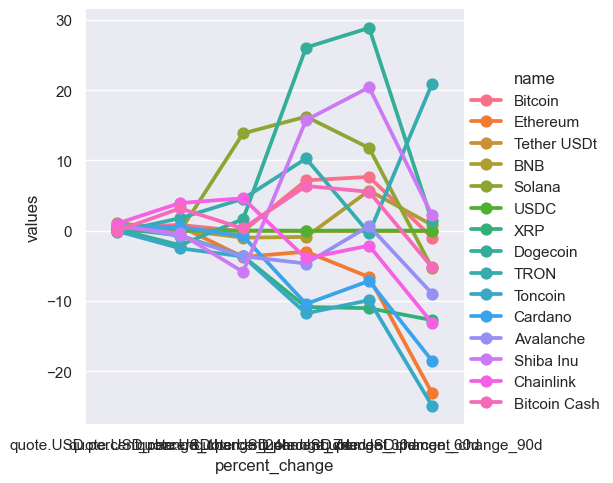

In [134]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df8, kind = 'point')

In [136]:


df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],['1h', '24h', '7d', '30d', '60d', '90d'])
df8

,name,percent_change,values
0,Bitcoin,1h,0.47025
1,Bitcoin,24h,0.80562
2,Bitcoin,7d,-0.10935
3,Bitcoin,30d,7.15010
4,Bitcoin,60d,7.64424
5,Bitcoin,90d,-0.99502
6,Ethereum,1h,0.11463
7,Ethereum,24h,0.61251
8,Ethereum,7d,-3.75160
9,Ethereum,30d,-3.00073


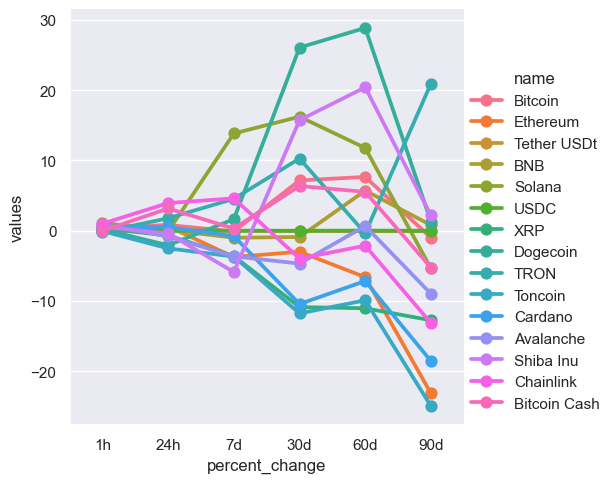

In [138]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df8, kind = 'point')

In [140]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name', 'quote.USD.price', 'timestamp']]
df10

,name,quote.USD.price,timestamp
0,Bitcoin,68252.48294,2024-10-25 21:05:45.052837
1,Ethereum,2549.10287,2024-10-25 21:05:45.052837
2,Tether USDt,0.99915,2024-10-25 21:05:45.052837
3,BNB,592.71620,2024-10-25 21:05:45.052837
4,Solana,174.97920,2024-10-25 21:05:45.052837
5,USDC,0.99961,2024-10-25 21:05:45.052837
6,XRP,0.52521,2024-10-25 21:05:45.052837
7,Dogecoin,0.13842,2024-10-25 21:05:45.052837
8,TRON,0.16648,2024-10-25 21:05:45.052837
9,Toncoin,5.03633,2024-10-25 21:05:45.052837


In [142]:
df10 = df[['name', 'quote.USD.price', 'timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,68252.48294,2024-10-25 21:05:45.052837
0,Bitcoin,68288.70784,2024-10-25 21:48:36.108664
0,Bitcoin,68268.88161,2024-10-25 21:49:37.172209
0,Bitcoin,68250.65166,2024-10-25 21:50:38.474816
0,Bitcoin,68297.82136,2024-10-25 21:51:39.591534
0,Bitcoin,68408.87395,2024-10-25 21:52:40.821488
0,Bitcoin,68394.54152,2024-10-25 21:53:41.938273
0,Bitcoin,68372.67366,2024-10-25 21:54:42.530989


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

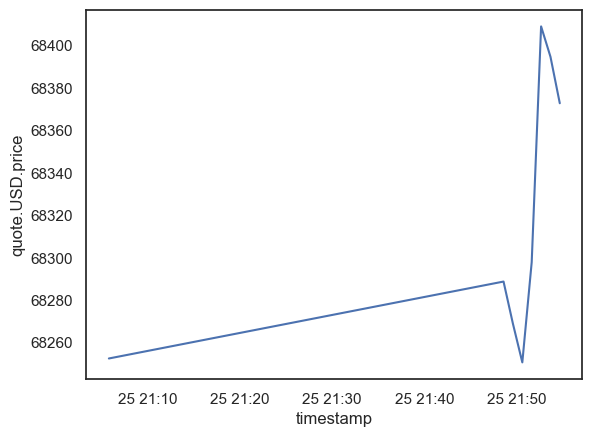

In [152]:

sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = df10)

<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

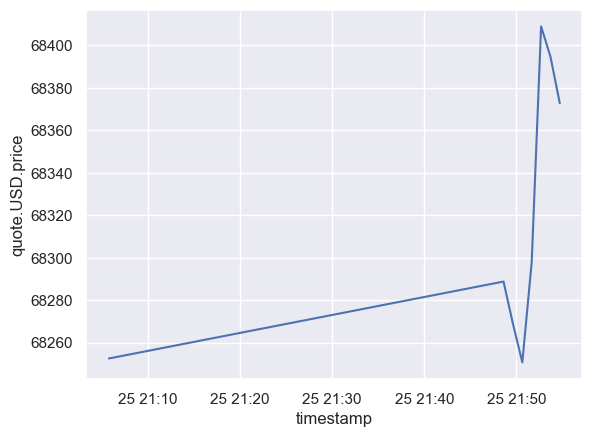

In [146]:
sns.set_theme(style = "darkgrid")

sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = df10)

# End